In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os

In [2]:
volcanodata = pd.read_excel("MI_compilation_XH2O.xlsx", sheet_name="XH2O_calculated")

SiO2_min = 30
SiO2_max = 80

vdatafilt = volcanodata[(volcanodata['SiO2'].between(SiO2_min, SiO2_max)) &
                                   (volcanodata['FluidMass_grams_VESIcal'] != 0)]  # Filtering SiO2 <= 57

vdatafilt.loc[:, 'Raman/Homog'] = vdatafilt['Raman/Homog'].fillna('')

is_intraplate=vdatafilt['Location type']=='INTRAPLATE'
is_sz=vdatafilt['Location type']=='SUBDUCTION ZONE'
is_rift=vdatafilt['Location type']=='RIFT'

Text(0, 0.5, 'XH2O')

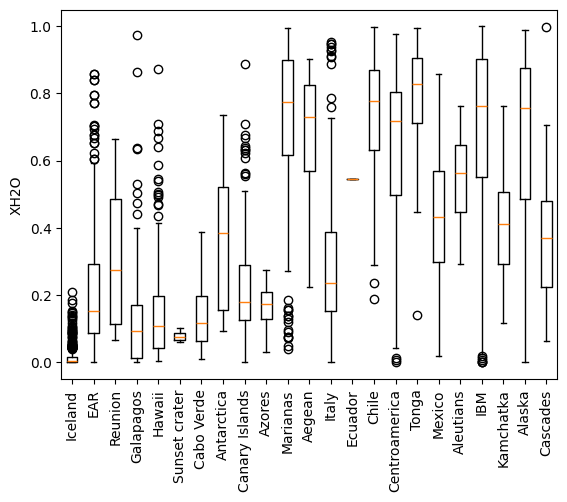

In [3]:
# Boxplot
fig,ax=plt.subplots(1,1)

SiO2_min = 35
SiO2_max = 57

vdatafilt2 = volcanodata[(volcanodata['SiO2'].between(SiO2_min, SiO2_max)) &
                                   (volcanodata['FluidMass_grams_VESIcal'] != 0)]  # Filtering SiO2 <= 57

boxplot_data = [vdatafilt2[vdatafilt2['Location'] == loc]['XH2O_fl_VESIcal'].values for loc in vdatafilt2['Location'].unique()]
labels = vdatafilt2['Location'].unique()
ax.boxplot(boxplot_data, labels=labels)
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel('XH2O')